In [ ]:
!pip install matplotlib numpy pandas scikit-learn

!pip install auto-ts --no-deps --ignore-installed
!pip install 'fsspec>=0.3.3'
!pip install statsmodels --upgrade
!pip install pmdarima
from auto_ts import auto_timeseries #https://github.com/AutoViML/Auto_TS#install

!pip install prophet
!pip install pystan
!pip install tscv

  Using cached auto_ts-0.0.71-py3-none-any.whl (109 kB)
Imported auto_timeseries version:0.0.71. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import plotly.express as px

In [112]:
data = pd.read_csv('/content/drive/Shareddrives/CS 4306 Barrios Project/csv Files/us_weekly_consumable_water_summary_20220102-20230903.csv')
data = data.copy(deep=True)

In [113]:
data = data[['Date','Corrected Total (L)','Corrected Potable (L)','Corrected Predicted (L)','Resupply Potable (L)','Resupply Technical (L)','Corrected Technical  (L)']]
data

,Date,Corrected Total (L),Corrected Potable (L),Corrected Predicted (L),Resupply Potable (L),Resupply Technical (L),Corrected Technical (L)
0,1/14/2022,4989.95,2420.0,4813.55,NaN,NaN,2569.95
1,1/21/2022,4973.60,2418.0,4710.65,NaN,NaN,2555.60
2,1/28/2022,4911.87,2416.0,4607.75,NaN,NaN,2495.87
3,2/4/2022,4876.53,2392.0,4504.85,NaN,NaN,2484.53
4,2/11/2022,4823.18,2290.0,4401.95,NaN,NaN,2533.18
...,...,...,...,...,...,...,...
82,8/11/2023,2216.96,192.0,1230.55,NaN,NaN,2024.96
83,8/18/2023,2158.13,167.0,1127.65,NaN,NaN,1991.13
84,8/25/2023,2063.66,141.0,1024.75,NaN,NaN,1922.66
85,9/1/2023,2174.17,196.0,921.85,NaN,NaN,1978.17


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/CS 4306 Barrios Project/csv Files/inventory_mgmt_system_consumables_20220101-20230905.csv')
inventory_mgmt_system_consumables = data.copy(deep=True)

In [ ]:
inventory_mgmt_system_consumables.columns =['datedim','id','id_parent','id_path','tree_depth','tree','part_number','serial_number','location_name','original_ip_owner','current_ip_owner','operational_nomenclature','russian_name','english_name','barcode','quantity','width','height','length','diameter','calculated_volume','stwg_ovrrd_vol','children_volume','stwg_ovrrd_chldren_vol','ovrrd_notes','volume_notes','expire_date','launch','type','hazard','state','status','is_container','is_moveable','system','subsystem','action_date','move_date','fill_status','categoryID','category_name']
pd.set_option('display.max_columns', None)
inventory_mgmt_system_consumables

,datedim,id,id_parent,id_path,tree_depth,tree,part_number,serial_number,location_name,original_ip_owner,current_ip_owner,operational_nomenclature,russian_name,english_name,barcode,quantity,width,height,length,diameter,calculated_volume,stwg_ovrrd_vol,children_volume,stwg_ovrrd_chldren_vol,ovrrd_notes,volume_notes,expire_date,launch,type,hazard,state,status,is_container,is_moveable,system,subsystem,action_date,move_date,fill_status,categoryID,category_name
0,2022-01-01 10:01:08.690,364156,265,/0/101/265/364156/,3,Storage Location,11Ф615.8720А55-20,1181,ФГБ1ГА,Russian Space Agency,RSA00,Корпус КТО,Корпус КТО,SOLID WESTE CONTAINER BODY,00077890R,1,NaN,425.00,NaN,330.0,0.68773,NaN,NaN,NaN,NaN,Cylinder; Assume volume = H*pi(D/2)^2,2024-07-17 00:00:00.000,Progress МS-13 (74P),Item,Non-hazardous,Functional,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.300,2020-10-10 19:22:04.300,NaN,3,KTO
1,2022-01-01 10:01:08.690,364157,265,/0/101/265/364157/,3,Storage Location,11Ф615.8720А55-20,1182,ФГБ1ГА,Russian Space Agency,RSA00,Корпус КТО,Корпус КТО,SOLID WESTE CONTAINER BODY,00077891R,1,NaN,425.00,NaN,330.0,0.68773,NaN,NaN,NaN,NaN,Cylinder; Assume volume = H*pi(D/2)^2,2024-07-17 00:00:00.000,Progress МS-13 (74P),Item,Non-hazardous,Functional,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.263,2020-10-10 19:22:04.263,NaN,3,KTO
2,2022-01-01 10:01:08.690,364158,265,/0/101/265/364158/,3,Storage Location,11Ф615.8720А55-10,1182,ФГБ1ГА,Russian Space Agency,RSA00,Днище КТО,Днище КТО,SOLID WASTE CONTAINER BOTTOM,00077923R,1,330.0,121.00,330.00,NaN,0.24930,NaN,NaN,NaN,NaN,Rectangular Prism; Assume volume = L*W*H,2024-07-17 00:00:00.000,Progress МS-13 (74P),Item,Non-hazardous,Functional,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.250,2020-10-10 19:22:04.250,NaN,3,KTO
3,2022-01-01 10:01:08.690,364160,265,/0/101/265/364160/,3,Storage Location,11Ф615.8720А55-20,1184,ФГБ1ГА,Russian Space Agency,RSA00,Корпус КТО,Корпус КТО,SOLID WESTE CONTAINER BODY,00077893R,1,NaN,425.00,NaN,330.0,0.68773,NaN,NaN,NaN,NaN,Cylinder; Assume volume = H*pi(D/2)^2,2024-07-17 00:00:00.000,Progress МS-13 (74P),Item,Non-hazardous,Functional,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.290,2020-10-10 19:22:04.290,NaN,3,KTO
4,2022-01-01 10:01:08.690,364161,265,/0/101/265/364161/,3,Storage Location,11Ф615.8720А55-20,1185,ФГБ1ГА,Russian Space Agency,RSA00,Корпус КТО,Корпус КТО,SOLID WESTE CONTAINER BODY,00077894R,1,NaN,425.00,NaN,330.0,0.68773,NaN,NaN,NaN,NaN,Cylinder; Assume volume = H*pi(D/2)^2,2024-07-17 00:00:00.000,Progress МS-13 (74P),Item,Non-hazardous,Functional,Stowed,1,1,SM Hygiene Sanitary Equipment,АсСУ,2020-10-10 19:22:04.220,2020-10-10 19:22:04.220,NaN,3,KTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790363,2023-09-05 15:20:48.003,409492,294523,/99/294510/294513/294523/409492/,4,Trash,SEG48102042-901,GO754,Trash,NASA,NASA,Food BOB,Внешний мешок для хранения пищевых контейнеров,BULK OVERWRAP BAG,NaN,1,304.8,123.83,377.83,NaN,0.26980,NaN,NaN,NaN,NaN,Rectangular Prism; Assume volume = L*W*H,NaN,CYG15,Item,NaN,Functional,Stowed,1,1,Food Supply,NaN,2021-06-03 09:02:52.670,2021-05-25 15:23:13.033,NaN,6,Food-US
5790364,2023-09-05 15:20:48.003,409493,294523,/99/294510/294513/294523/409493/,4,Trash,SEG48102042-901,GO686,Trash,NASA,NASA,Food BOB,Внешний мешок для хранения пищевых контейнеров,BULK OVERWRAP BAG,NaN,1,304.8,123.95,377.95,NaN,0.27015,NaN,NaN,NaN,NaN,Rectangular Prism; Assume volume = L*W*H,NaN,CYG15,Item,NaN,Functional,Stowed,1,1,Food Supply,NaN,2021-06-03 09:01:21.467,2021-05-25 15:21:06.393,NaN,6,Food-US
5790365,2023-09-05 15:20:48.003,404856,99,/99/404856/,1,Trash,11Ф615.8720А55-20,NA_01272021,Trash,NASA,NASA,Solid Waste Container - Body,Корпус контейнера твердых отходов,SOLID WASTE CONTAINER - BODY,NaN,1,330.0,346.00,330.00,NaN,0.71288,NaN,0.16483,NaN,NaN,Rectang

In [85]:
#data = inventory_mgmt_system_consumables
#data = data[data["english_name"] == 'PRETREAT TANK WITH CAP']
#data = data[['datedim', 'calculated_volume']].copy()
data['Date'] = data['Date'].apply(lambda x: x if len(x) < 11 else x[:10])
#data=data.groupby("Date", group_keys=True).sum() # https://stackoverflow.com/questions/65033618/how-to-get-the-sum-of-values-with-the-same-date-in-python-data-frame
#data = data.reset_index(drop=False)
data

TypeError: ignored

In [114]:
#date_column='datedim'
#pred_column='calculated_volume'
date_column='Date'
pred_column='Corrected Total (L)'
data[date_column]=pd.to_datetime(data[date_column])

In [115]:
data[date_column].max() - data[date_column].min()

Timedelta('600 days 00:00:00')

In [116]:
#drop missing values() you dont have to do this
data['Resupply Potable (L)'] = data['Resupply Potable (L)'].fillna(0)
data['Resupply Technical (L)'] = data['Resupply Technical (L)'].fillna(0)
# data.dropna(inplace=True) deletes the columns with nan
data.reset_index()

,index,Date,Corrected Total (L),Corrected Potable (L),Corrected Predicted (L),Resupply Potable (L),Resupply Technical (L),Corrected Technical (L)
0,0,2022-01-14,4989.95,2420.0,4813.55,0.0,0.0,2569.95
1,1,2022-01-21,4973.60,2418.0,4710.65,0.0,0.0,2555.60
2,2,2022-01-28,4911.87,2416.0,4607.75,0.0,0.0,2495.87
3,3,2022-02-04,4876.53,2392.0,4504.85,0.0,0.0,2484.53
4,4,2022-02-11,4823.18,2290.0,4401.95,0.0,0.0,2533.18
...,...,...,...,...,...,...,...,...
82,82,2023-08-11,2216.96,192.0,1230.55,0.0,0.0,2024.96
83,83,2023-08-18,2158.13,167.0,1127.65,0.0,0.0,1991.13
84,84,2023-08-25,2063.66,141.0,1024.75,0.0,0.0,1922.66
85,85,2023-09-01,2174.17,196.0,921.85,0.0,0.0,1978.17


In [117]:
#split Data into training and Testing
train_df = data.iloc[:-15]
test_df = data.iloc[-15:]

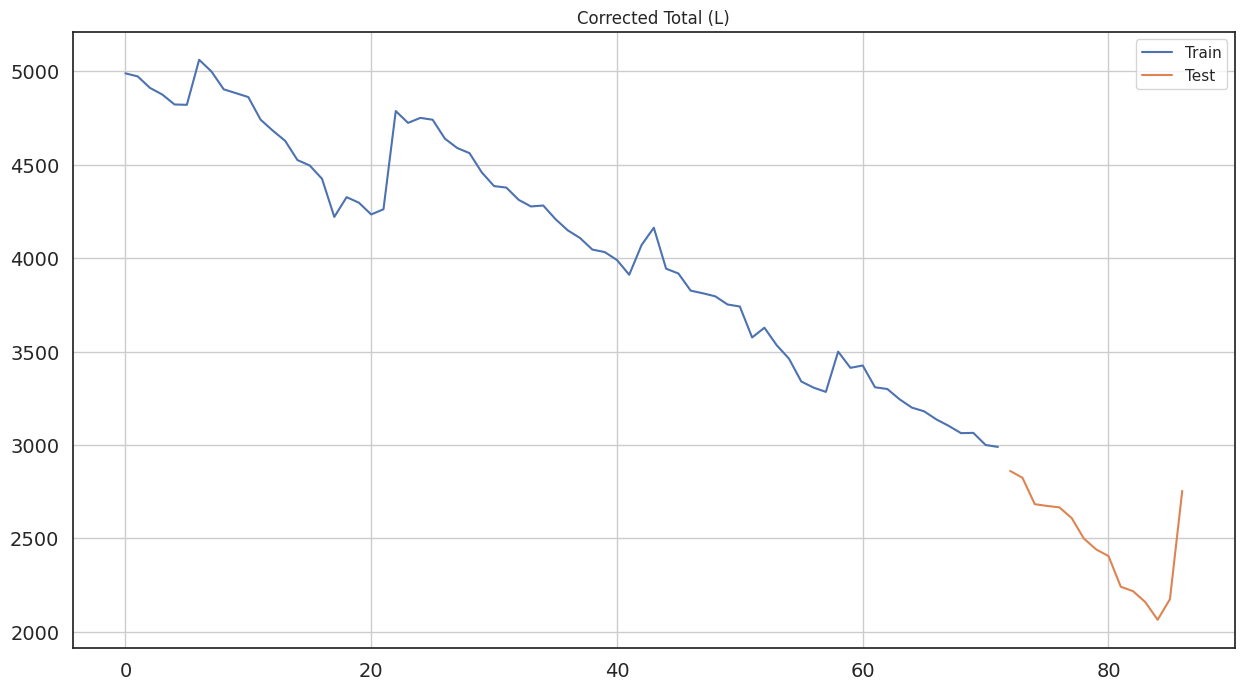

In [118]:
train_df[pred_column].plot(figsize=(15,8), title=pred_column, fontsize=14, label='Train')
test_df[pred_column].plot(figsize=(15,8), title=pred_column, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/mx2lgf45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/hfe9kq00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78649', 'data', 'file=/tmp/tmp3i7lhox9/mx2lgf45.json', 'init=/tmp/tmp3i7lhox9/hfe9kq00.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_modelxg18kjdg/prophet_model-20231029012407.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Start of Fit.....
    Target variable given as = Corrected Total (L)
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Corrected Total (L)']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (72, 6)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Alert! Data is not stationary even after two differencing. Continuing...
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as W
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag 

01:24:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/6odgo4es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/5uuj7y3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4156', 'data', 'file=/tmp/tmp3i7lhox9/6odgo4es.json', 'init=/tmp/tmp3i7lhox9/5uuj7y3i.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_model1wjf3zrb/prophet_model-20231029012408.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 151.28
    Std Deviation of actuals = 84.15
    Normalized RMSE (as pct of std dev) = 180%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/l_867x4t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/q5jshm51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86996', 'data', 'file=/tmp/tmp3i7lhox9/l_867x4t.json', 'init=/tmp/tmp3i7lhox9/q5jshm51.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_modelx04evdt5/prophet_model-20231029012408.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 219.89
    Std Deviation of actuals = 119.45
    Normalized RMSE (as pct of std dev) = 184%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/vkdd9x2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/nxt0bdsh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22992', 'data', 'file=/tmp/tmp3i7lhox9/vkdd9x2i.json', 'init=/tmp/tmp3i7lhox9/nxt0bdsh.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_model75rup934/prophet_model-20231029012408.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 91.80
    Std Deviation of actuals = 79.43
    Normalized RMSE (as pct of std dev) = 116%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 62 Test Shape: 5


01:24:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/at7i3jpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/p5bhyfvy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98121', 'data', 'file=/tmp/tmp3i7lhox9/at7i3jpt.json', 'init=/tmp/tmp3i7lhox9/p5bhyfvy.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_model3uqsy3un/prophet_model-20231029012408.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 19.31
    Std Deviation of actuals = 55.86
    Normalized RMSE (as pct of std dev) = 35%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 67 Test Shape: 5


01:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 24.93
    Std Deviation of actuals = 42.66
    Normalized RMSE (as pct of std dev) = 58%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/paw8ebxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3i7lhox9/2mxfi3_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5485', 'data', 'file=/tmp/tmp3i7lhox9/paw8ebxc.json', 'init=/tmp/tmp3i7lhox9/2mxfi3_j.json', 'output', 'file=/tmp/tmp3i7lhox9/prophet_modelk04aes66/prophet_model-20231029012409.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
01:24:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 90.99
    MSE (Mean Squared Error = 16131.77
    MAPE (Mean Absolute Percent Error) = 3%
    RMSE (Root Mean Squared Error) = 127.0109
    Normalized RMSE (MinMax) = 15%
    Normalized RMSE (as Std Dev of Actuals)= 50%
Time Taken = 2 seconds


01:24:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=568.670, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=570.652, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=570.648, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=568.957, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.440 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=626.534, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=628.505, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=628.498, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=627.777, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.976 seconds
Performing stepwise search to mini

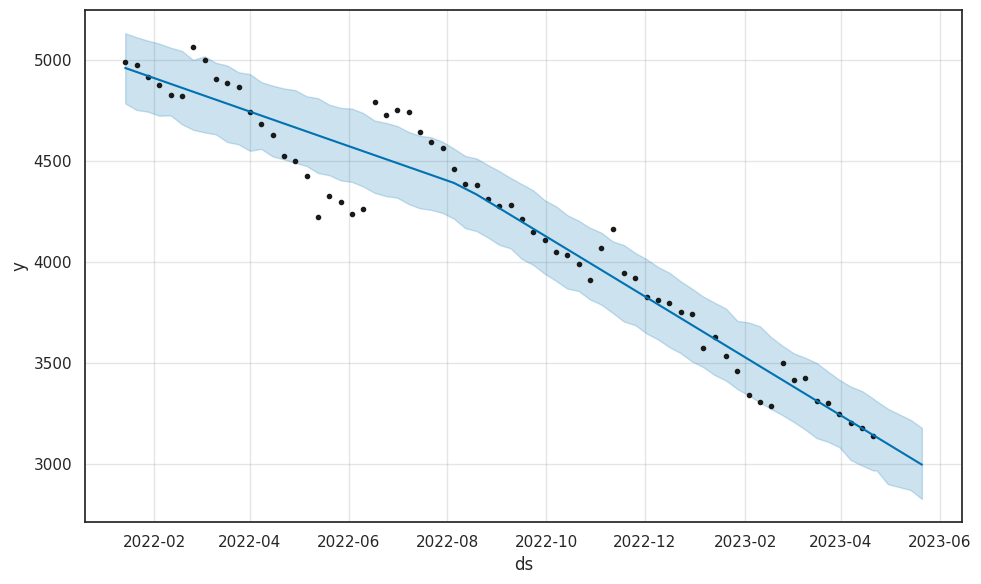

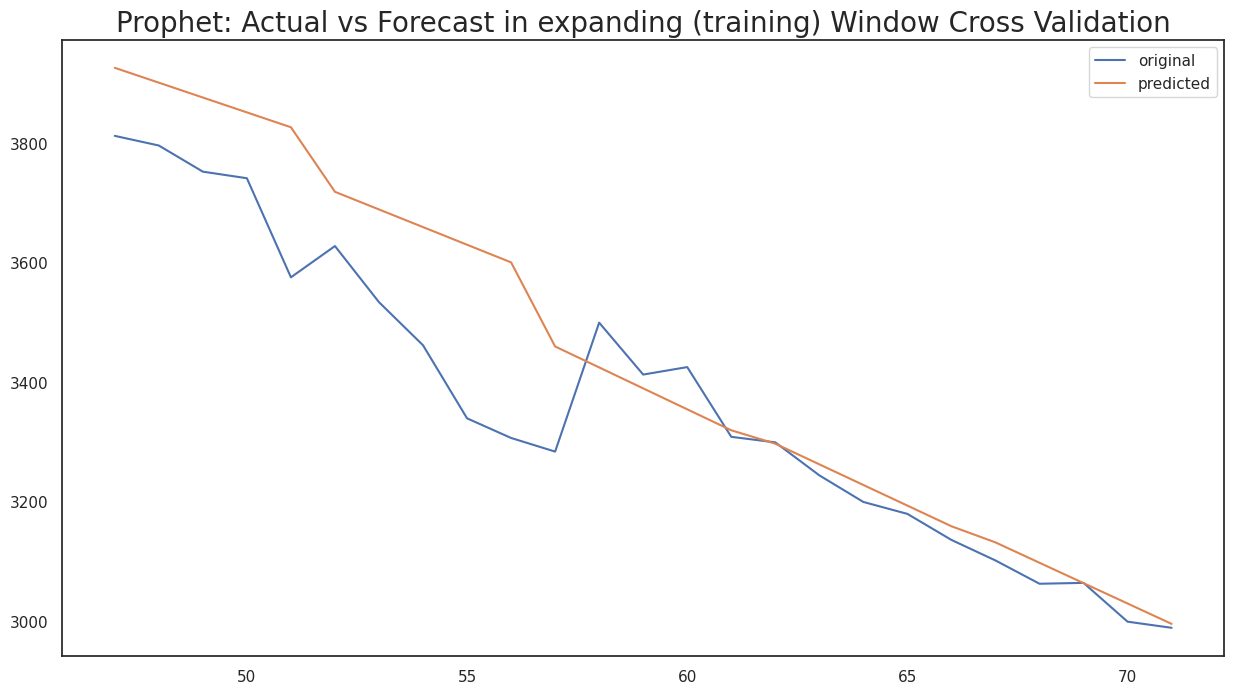

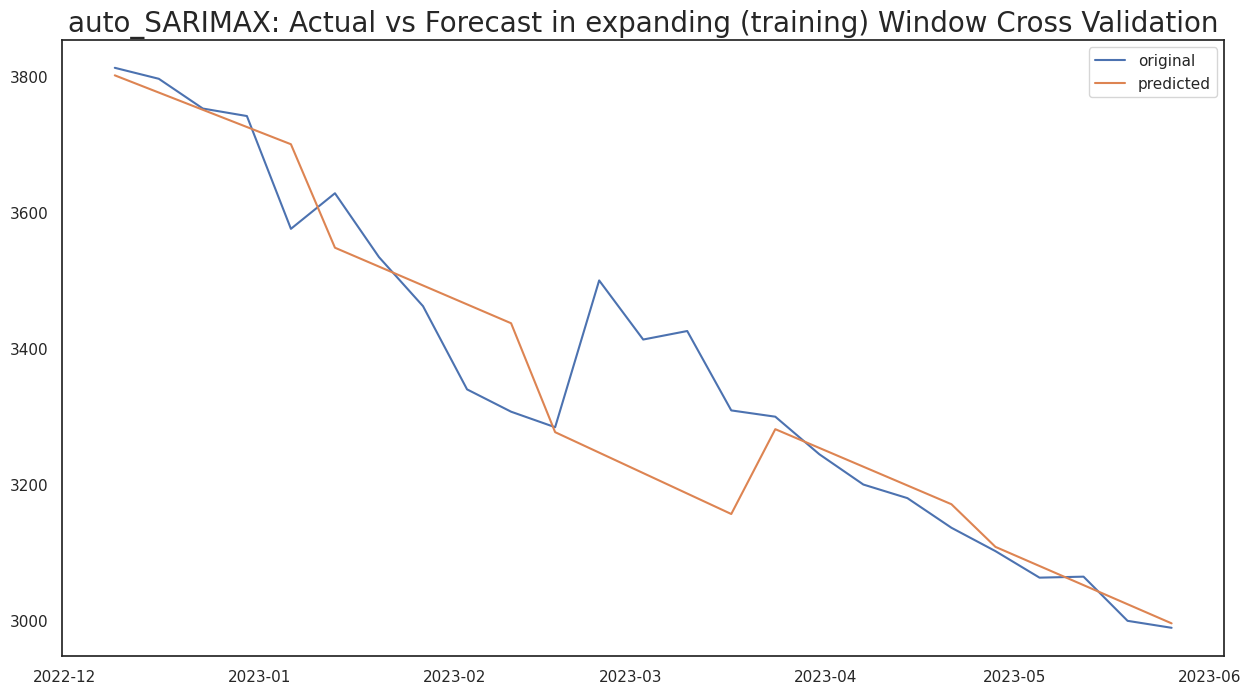

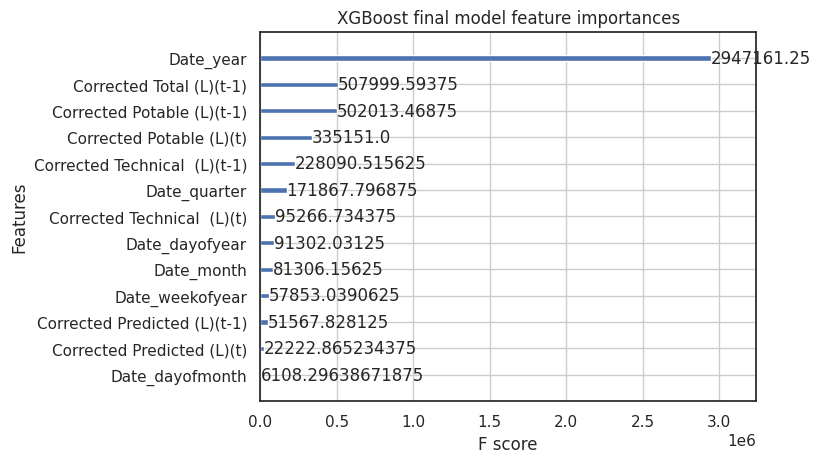

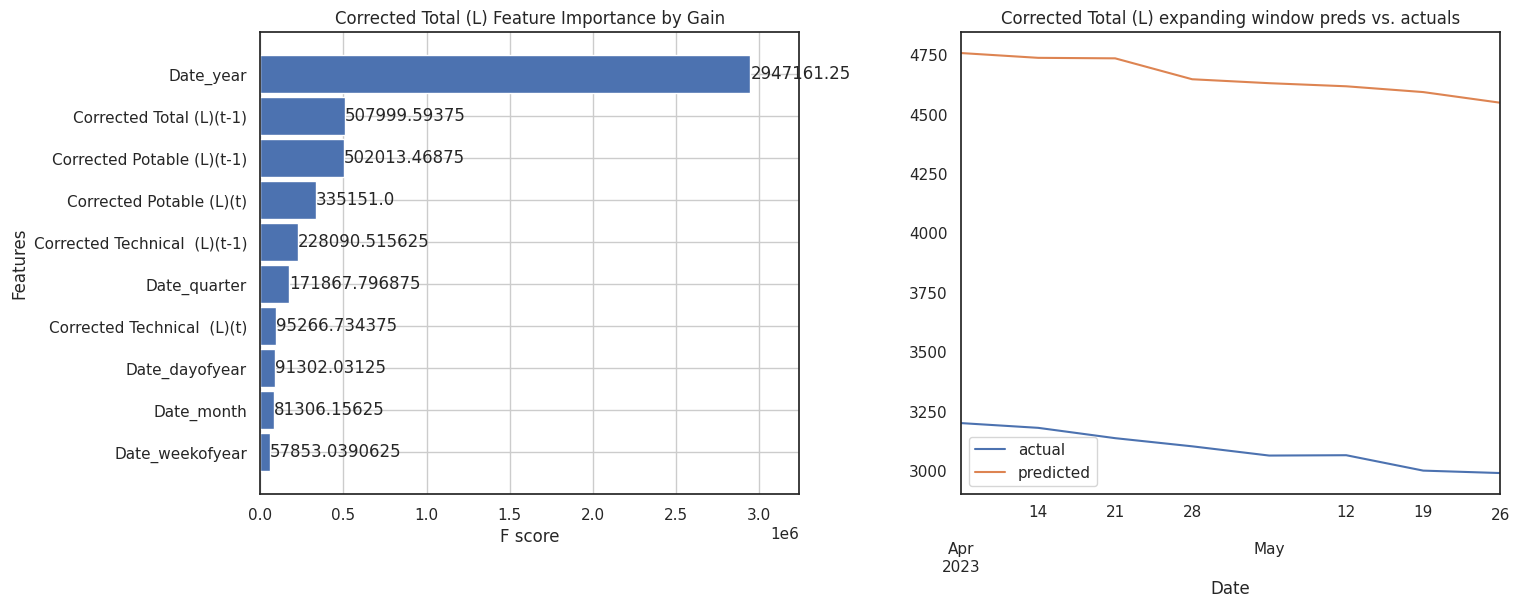

In [119]:
# start training model
model = auto_timeseries(score_type='rmse', time_interval='W', model_type='best')
model.fit(traindata= train_df, ts_column=date_column, target=pred_column, cv=5)

In [120]:
model.get_leaderboard()


,name,rmse
1,auto_SARIMAX,75.105962
0,Prophet,101.442298
3,ML,1567.750859
2,VAR,inf


In [125]:
future_predictions = model.predict(train_df,model="Prophet")

Predicting using test dataframe as input for auto_SARIMAX model
Building Forecast dataframe. Forecast Period = 72


In [105]:
future_predictions.tail()

Corrected Total (L),yhat,mean_se,mean_ci_lower,mean_ci_upper
2023-06-02,2952.787250,99.575290,2757.623267,3147.951232
2023-06-09,2915.796455,140.820726,2639.792903,3191.800006
2023-06-16,2878.567615,172.469462,2540.533681,3216.601549
2023-06-23,2841.100731,199.150581,2450.772766,3231.428697
2023-06-30,2803.395803,222.657118,2366.995871,3239.795735


In [ ]:


test_df = pd.DataFrame(test_df)
test_df = test_df.set_index(['Date'])
data = data.set_index(['Date'])


KeyError: ignored

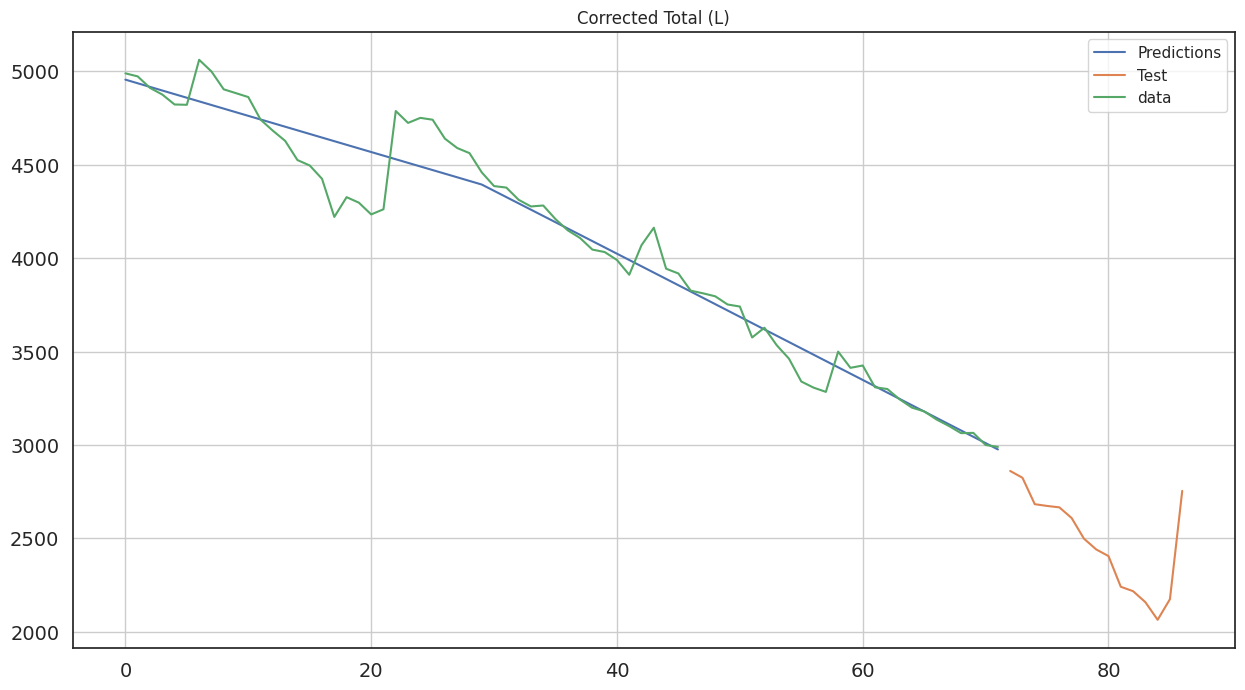

In [124]:
future_predictions['yhat'].plot(figsize=(15,8), title=pred_column, fontsize=14, label='Predictions')
test_df[pred_column].plot(figsize=(15,8), title=pred_column, fontsize=14, label='Test')
train_df[pred_column].plot(figsize=(15,8), title=pred_column, fontsize=14, label='data')

plt.legend()
plt.grid()
plt.show()